# Covid, Flu, Allergy and Cold Symptoms

## Exploratory Data Analysis

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
import numpy as np

In [2]:
df = pd.read_csv('large_data.csv')

In [16]:
df.shape

(44453, 21)

In [17]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [18]:
df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


In [4]:
covid_df = df.loc[df['TYPE'] == 'COVID']
flu_df = df.loc[df['TYPE'] == 'FLU']
allergy_df = df.loc[df['TYPE'] == 'ALLERGY']
cold_df = df.loc[df['TYPE'] == 'COLD']

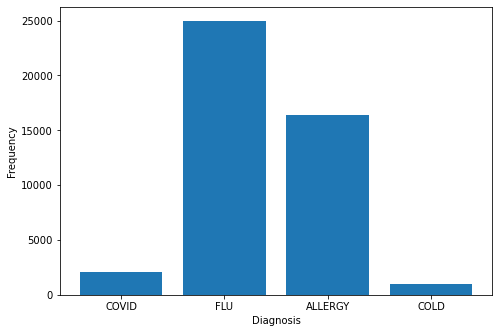

In [71]:
data = [covid_df.shape[0],flu_df.shape[0],allergy_df.shape[0],cold_df.shape[0]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([1,2,3,4], data, tick_label=['COVID', 'FLU', 'ALLERGY', 'COLD'])

plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001580349DF98>,
      dtype=object)

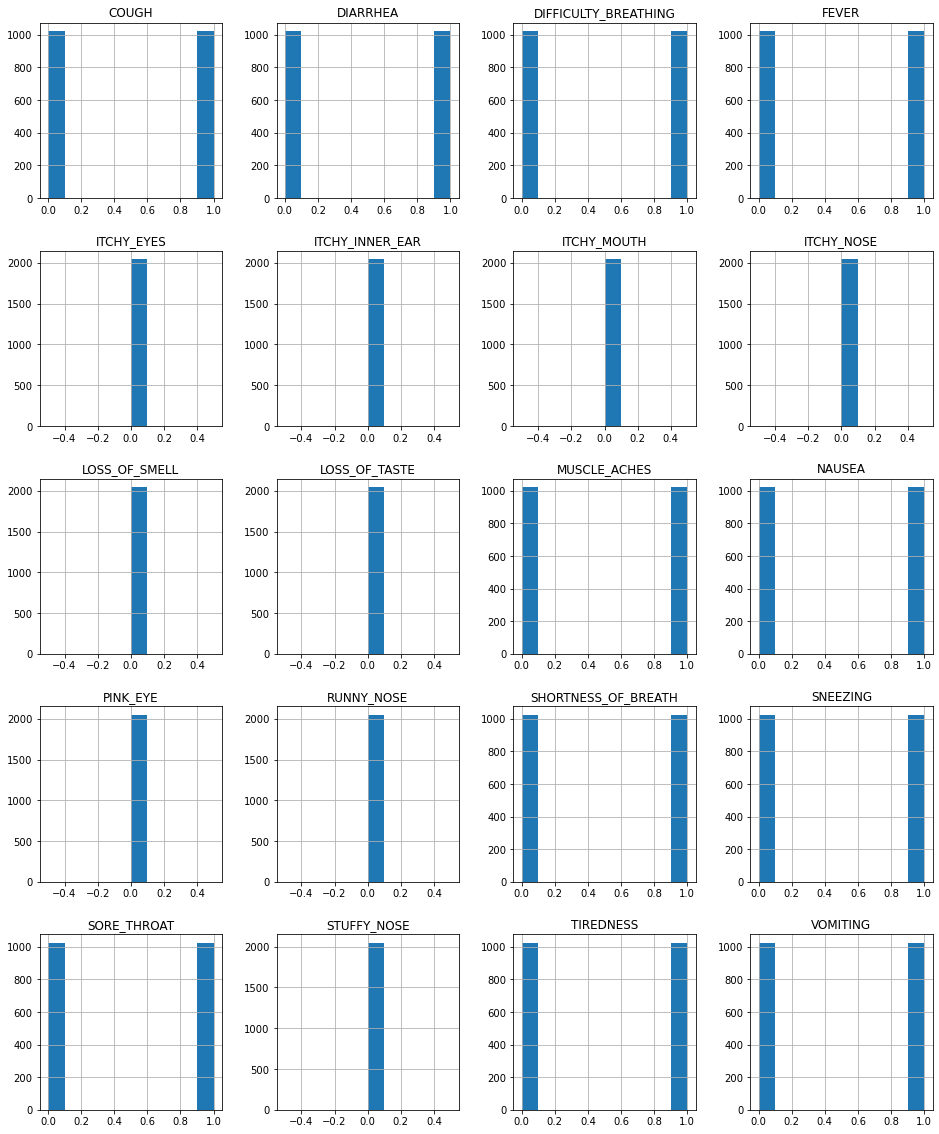

In [23]:
covid_df.hist(figsize=(16, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158047AA518>,
      dtype=object)

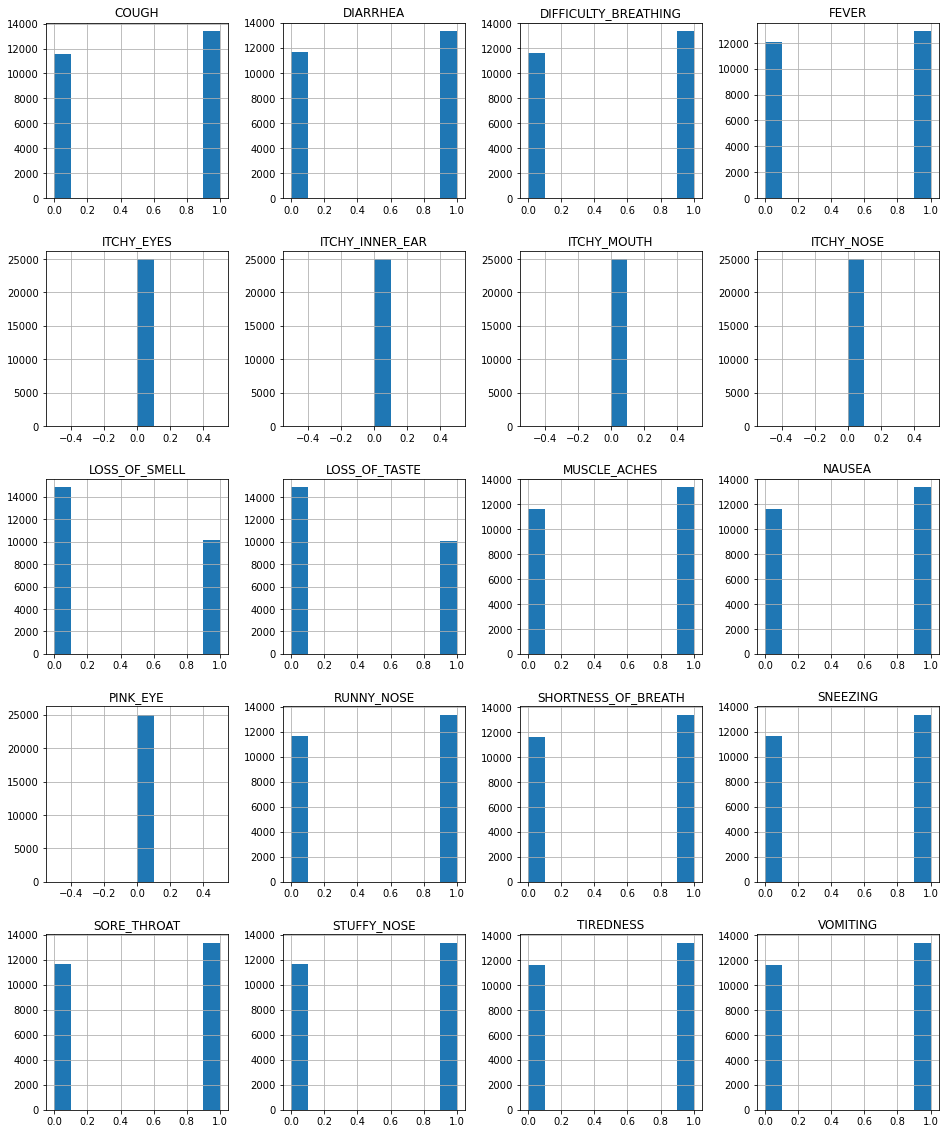

In [24]:
flu_df.hist(figsize=(16, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001587F9ABE10>,
      dtype=object)

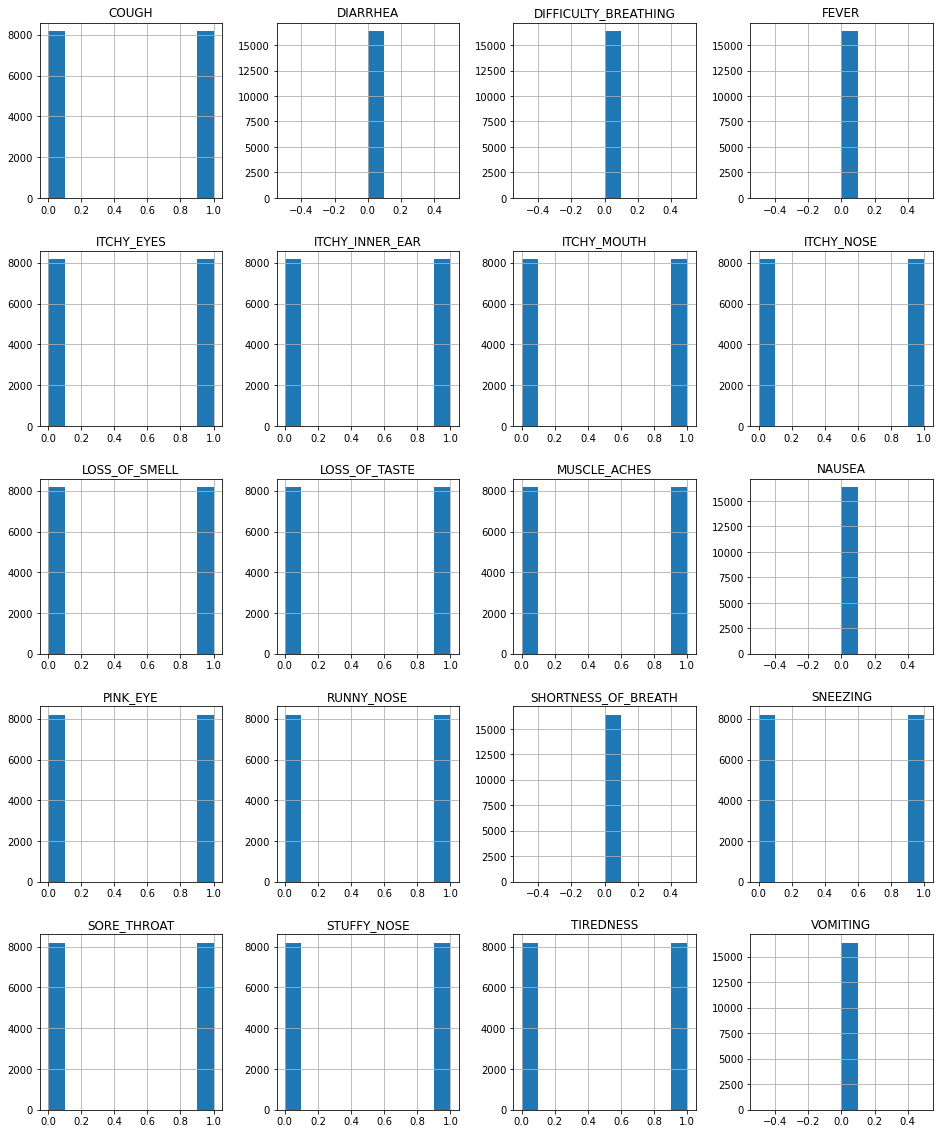

In [25]:
allergy_df.hist(figsize=(16, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015802598DA0>,
      dtype=object)

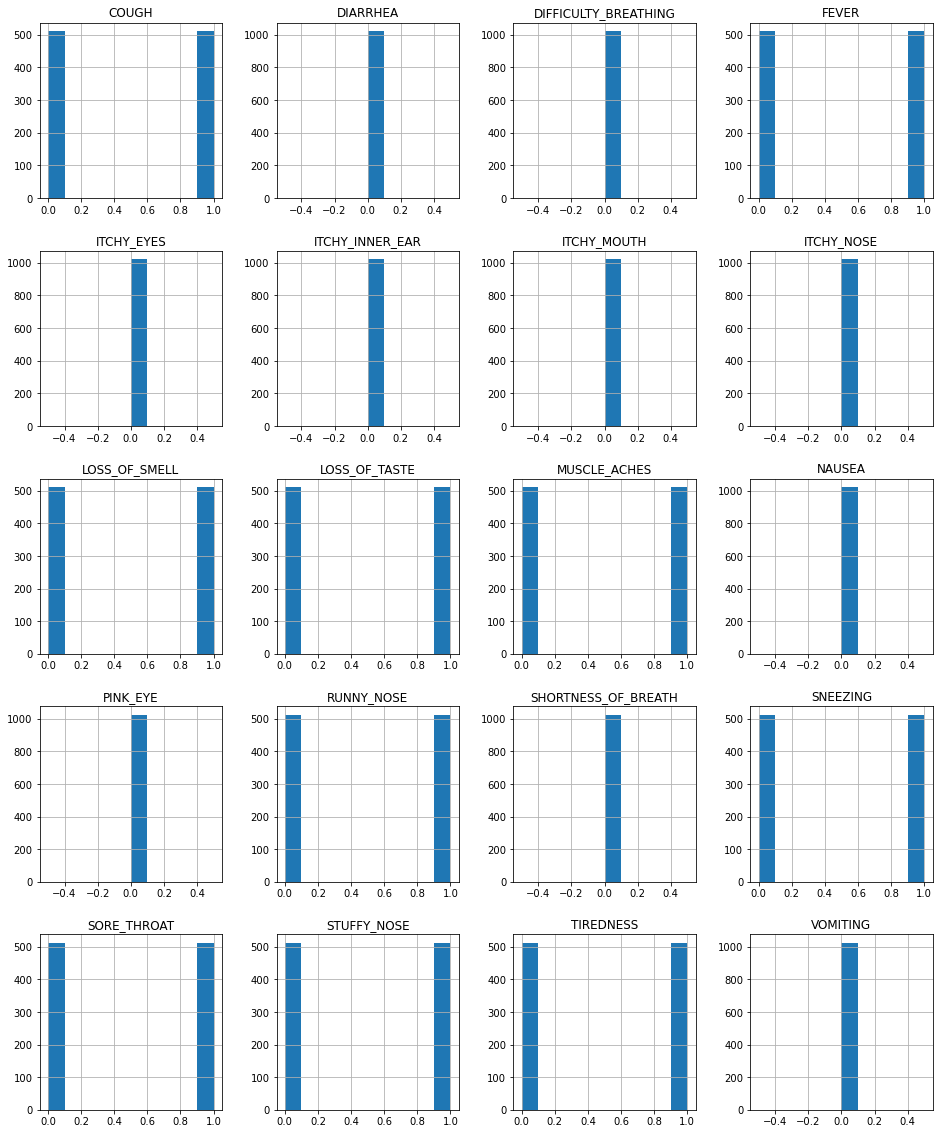

In [26]:
cold_df.hist(figsize=(16, 20))

## Data Prepocessing

Treat type as categorical data

In [3]:
df['TYPE'] = df['TYPE'].astype('category')

Dividir tabela por tipo

In [5]:
undersampled_df = pd.concat([cold_df, 
    covid_df.sample(n=1024, random_state=1), 
    allergy_df.sample(n=1024, random_state=1), 
    flu_df.sample(n=1024, random_state=1)])

oversampled_df = pd.concat([cold_df.sample(n=25000, replace=True, random_state=1), 
    covid_df.sample(n=25000, replace=True, random_state=1), 
    allergy_df.sample(n=25000, replace=True, random_state=1), 
    flu_df])


In [6]:
input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values

undersampled_inputs = undersampled_df[input_names].values
undersampled_labels = undersampled_df['TYPE'].values

oversampled_inputs = oversampled_df[input_names].values
oversampled_labels = oversampled_df['TYPE'].values

In [8]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify=all_labels)

(u_training_inputs,
 u_testing_inputs,
 u_training_classes,
 u_testing_classes) = train_test_split(undersampled_inputs, undersampled_labels, test_size=0.25, random_state=1, stratify=undersampled_labels)

(o_training_inputs,
 o_testing_inputs,
 o_training_classes,
 o_testing_classes) = train_test_split(oversampled_inputs, oversampled_labels, test_size=0.25, random_state=1, stratify=oversampled_labels)

In [9]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs) 

scaler.fit(u_training_inputs)
u_training_inputs = scaler.transform(u_training_inputs)
u_testing_inputs = scaler.transform(u_testing_inputs) 

scaler.fit(o_training_inputs)
o_training_inputs = scaler.transform(o_training_inputs)
o_testing_inputs = scaler.transform(o_testing_inputs) 

## Supervised Learning

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)
dtc_all_predictions = decision_tree_classifier.predict(testing_inputs)

decision_tree_classifier.fit(u_training_inputs, u_training_classes)
dtc_under_predictions = decision_tree_classifier.predict(u_testing_inputs)

decision_tree_classifier.fit(o_training_inputs, o_training_classes)
dtc_over_predictions = decision_tree_classifier.predict(o_testing_inputs)

dtc_all_report = classification_report(testing_classes, dtc_all_predictions, output_dict=True)
dtc_under_report = classification_report(u_testing_classes, dtc_under_predictions, output_dict=True)
dtc_over_report = classification_report(o_testing_classes, dtc_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, dtc_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, dtc_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, dtc_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.97      0.96      4096
        COLD       0.29      0.29      0.29       256
       COVID       0.18      0.20      0.19       512
         FLU       0.93      0.91      0.92      6250

    accuracy                           0.89     11114
   macro avg       0.59      0.59      0.59     11114
weighted avg       0.89      0.89      0.89     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       0.93      0.97      0.95       256
        COLD       0.94      0.87      0.90       256
       COVID       0.87      0.88      0.88       256
         FLU       0.88      0.89      0.89       256

    accuracy                           0.90      1024
   macro avg       0.90      0.90      0.90      1024
weighted avg       0.90      0.90      0.90      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### Support Vector Machines

In [51]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(training_inputs, training_classes)
svc_all_predictions = svc.predict(testing_inputs)

svc.fit(u_training_inputs, u_training_classes)
svc_under_predictions = svc.predict(u_testing_inputs)

svc.fit(o_training_inputs, o_training_classes)
svc_over_predictions = svc.predict(o_testing_inputs)

svc_all_report = classification_report(testing_classes, svc_all_predictions, output_dict=True)
svc_under_report = classification_report(u_testing_classes, svc_under_predictions, output_dict=True)
svc_over_report = classification_report(o_testing_classes, svc_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, svc_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, svc_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, svc_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.95      0.99      0.97      4096
        COLD       0.57      0.46      0.51       256
       COVID       0.40      0.42      0.41       512
         FLU       0.95      0.93      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.72      0.70      0.71     11114
weighted avg       0.92      0.92      0.92     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99       256
        COLD       0.94      1.00      0.97       256
       COVID       0.91      0.97      0.94       256
         FLU       1.00      0.89      0.94       256

    accuracy                           0.96      1024
   macro avg       0.96      0.96      0.96      1024
weighted avg       0.96      0.96      0.96      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### K-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(training_inputs, training_classes)
knn_all_predictions = knn.predict(testing_inputs)

knn.fit(u_training_inputs, u_training_classes)
knn_under_predictions = knn.predict(u_testing_inputs)

knn.fit(o_training_inputs, o_training_classes)
knn_over_predictions = knn.predict(o_testing_inputs)

knn_all_report = classification_report(testing_classes, knn_all_predictions, output_dict=True)
knn_under_report = classification_report(u_testing_classes, knn_under_predictions, output_dict=True)
knn_over_report = classification_report(o_testing_classes, knn_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, knn_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, knn_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, knn_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.98      0.97      4096
        COLD       0.44      0.45      0.45       256
       COVID       0.11      0.04      0.05       512
         FLU       0.92      0.96      0.94      6250

    accuracy                           0.91     11114
   macro avg       0.61      0.61      0.60     11114
weighted avg       0.89      0.91      0.90     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99       256
        COLD       0.88      0.97      0.93       256
       COVID       0.75      0.98      0.85       256
         FLU       1.00      0.62      0.76       256

    accuracy                           0.89      1024
   macro avg       0.91      0.89      0.88      1024
weighted avg       0.91      0.89      0.88      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### Neural Networks

In [53]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

nn.fit(training_inputs, training_classes)
nn_all_predictions = nn.predict(testing_inputs)

nn.fit(u_training_inputs, u_training_classes)
nn_under_predictions = nn.predict(u_testing_inputs)

nn.fit(o_training_inputs, o_training_classes)
nn_over_predictions = nn.predict(o_testing_inputs)

nn_all_report = classification_report(testing_classes, nn_all_predictions, output_dict=True)
nn_under_report = classification_report(u_testing_classes, nn_under_predictions, output_dict=True)
nn_over_report = classification_report(o_testing_classes, nn_over_predictions, output_dict=True)

print("Original dataset:\n",classification_report(testing_classes, nn_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, nn_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, nn_over_predictions))

C:\Users\ineso\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.98      0.97      4096
        COLD       0.42      0.40      0.41       256
       COVID       0.27      0.22      0.24       512
         FLU       0.93      0.94      0.93      6250

    accuracy                           0.91     11114
   macro avg       0.65      0.63      0.64     11114
weighted avg       0.90      0.91      0.90     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99       256
        COLD       0.94      0.96      0.95       256
       COVID       0.88      0.98      0.93       256
         FLU       1.00      0.89      0.9

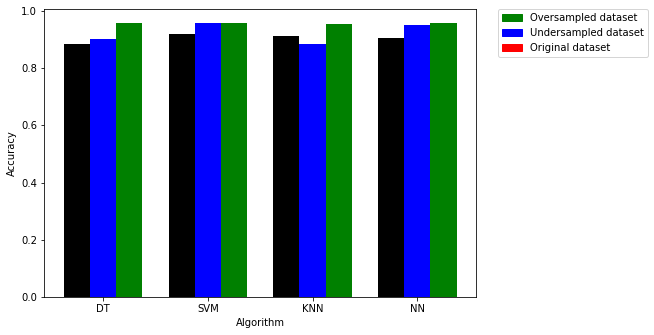

In [65]:
data = [
    [dtc_all_report['accuracy'],svc_all_report['accuracy'],knn_all_report['accuracy'],nn_all_report['accuracy']],
    [dtc_under_report['accuracy'],svc_under_report['accuracy'],knn_under_report['accuracy'],nn_under_report['accuracy']],
    [dtc_over_report['accuracy'],svc_over_report['accuracy'],knn_over_report['accuracy'],nn_over_report['accuracy']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#000000', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = 'g', width = 0.25)

green_patch = mpatches.Patch(color='green', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='blue', label='Undersampled dataset')
red_patch = mpatches.Patch(color='red', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

plt.show()

Plotting for ALLERGY

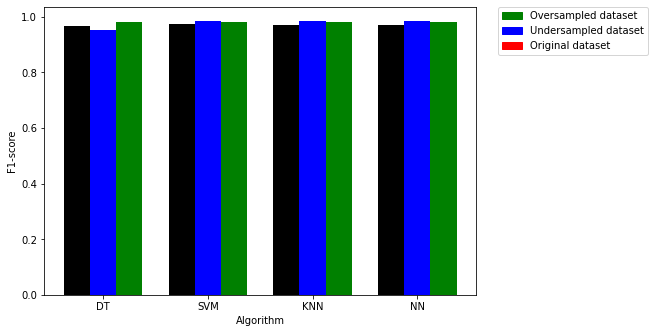

In [66]:
data = [
    [dtc_all_report['ALLERGY']['f1-score'],svc_all_report['ALLERGY']['f1-score'],knn_all_report['ALLERGY']['f1-score'],nn_all_report['ALLERGY']['f1-score']],
    [dtc_under_report['ALLERGY']['f1-score'],svc_under_report['ALLERGY']['f1-score'],knn_under_report['ALLERGY']['f1-score'],nn_under_report['ALLERGY']['f1-score']],
    [dtc_over_report['ALLERGY']['f1-score'],svc_over_report['ALLERGY']['f1-score'],knn_over_report['ALLERGY']['f1-score'],nn_over_report['ALLERGY']['f1-score']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#000000', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = 'g', width = 0.25)

green_patch = mpatches.Patch(color='green', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='blue', label='Undersampled dataset')
red_patch = mpatches.Patch(color='red', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")

plt.show()

Plotting for FLU

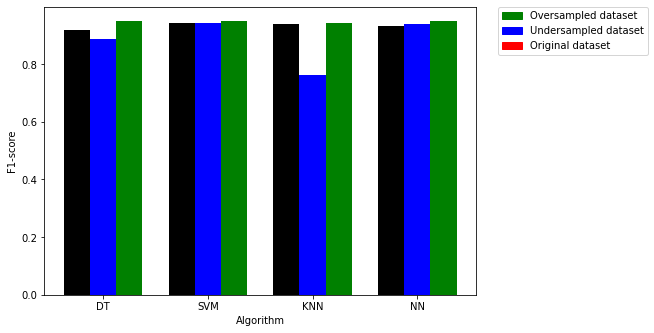

In [67]:
data = [
    [dtc_all_report['FLU']['f1-score'],svc_all_report['FLU']['f1-score'],knn_all_report['FLU']['f1-score'],nn_all_report['FLU']['f1-score']],
    [dtc_under_report['FLU']['f1-score'],svc_under_report['FLU']['f1-score'],knn_under_report['FLU']['f1-score'],nn_under_report['FLU']['f1-score']],
    [dtc_over_report['FLU']['f1-score'],svc_over_report['FLU']['f1-score'],knn_over_report['FLU']['f1-score'],nn_over_report['FLU']['f1-score']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#000000', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = 'g', width = 0.25)

green_patch = mpatches.Patch(color='green', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='blue', label='Undersampled dataset')
red_patch = mpatches.Patch(color='red', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")

plt.show()

Plotting for COVID

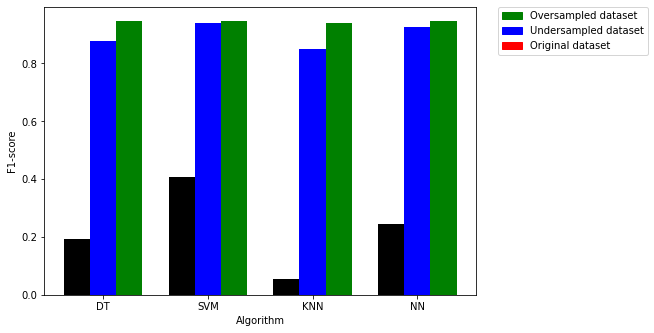

In [68]:
data = [
    [dtc_all_report['COVID']['f1-score'],svc_all_report['COVID']['f1-score'],knn_all_report['COVID']['f1-score'],nn_all_report['COVID']['f1-score']],
    [dtc_under_report['COVID']['f1-score'],svc_under_report['COVID']['f1-score'],knn_under_report['COVID']['f1-score'],nn_under_report['COVID']['f1-score']],
    [dtc_over_report['COVID']['f1-score'],svc_over_report['COVID']['f1-score'],knn_over_report['COVID']['f1-score'],nn_over_report['COVID']['f1-score']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#000000', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = 'g', width = 0.25)

green_patch = mpatches.Patch(color='green', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='blue', label='Undersampled dataset')
red_patch = mpatches.Patch(color='red', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")

plt.show()

Plotting for COLD

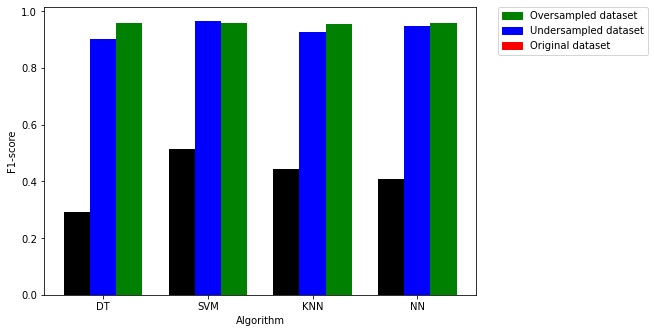

In [69]:
data = [
    [dtc_all_report['COLD']['f1-score'],svc_all_report['COLD']['f1-score'],knn_all_report['COLD']['f1-score'],nn_all_report['COLD']['f1-score']],
    [dtc_under_report['COLD']['f1-score'],svc_under_report['COLD']['f1-score'],knn_under_report['COLD']['f1-score'],nn_under_report['COLD']['f1-score']],
    [dtc_over_report['COLD']['f1-score'],svc_over_report['COLD']['f1-score'],knn_over_report['COLD']['f1-score'],nn_over_report['COLD']['f1-score']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#000000', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = 'g', width = 0.25)

green_patch = mpatches.Patch(color='green', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='blue', label='Undersampled dataset')
red_patch = mpatches.Patch(color='red', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")

plt.show()

## Parameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [8, 9, 10, 11, 12, 13],
                  'max_features': [5, 6, 7, 8, 9, 10],
                  'class_weight' : [None, {'ALLERGY':1, 'FLU':1, 'COVID':1, 'COLD':2}]}

dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           dtc_param_grid=parameter_grid,
                           cv=10)

dtc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))